In [ ]:
pip install torch numpy tokenizers nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Libraries installed.
Checking/downloading NLTK data (punkt, wordnet, omw-1.4)...
---------------------------------------------------------
NLTK data download might be needed or failed previously.
If stemming fails later, run the following in a code cell:
import nltk; nltk.download('punkt'); nltk.download('wordnet'); nltk.download('omw-1.4')
---------------------------------------------------------
Using device: cuda
Tokenizer will be saved/loaded from: shakespeare_tokenizer_bpe_8000.json
Best model will be saved to: best_model_shakespeare_lstm.pt
Please upload the dataset file ('shakespeare.txt' or specify different name in Config)


Saving shakespeare.txt to shakespeare (1).txt
Assuming uploaded file 'shakespeare (1).txt' is the dataset.
Successfully loaded 1155394 characters from shakespeare (1).txt
Loading existing tokenizer from shakespeare_tokenizer_bpe_8000.json
Processing text for dataset...
Encoding text with tokenizer...
Encoding complete.
Creating sequences...
Sequence creation complete.

Tokenizer Vocabulary size: 8000
Total tokens in processed text: 275814
Total sequences created: 275754
Training set size: 248179
Validation set size: 27575
Number of training batches: 1938
Number of validation batches: 215

--- Model Architecture ---
RNNModel(
  (embedding): Embedding(8000, 256)
  (rnn): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout_layer): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=512, out_features=8000, bias=True)
)
Total trainable parameters: 9,830,208
No pre-trained model specified or found. Training from scratch.

--- Starting Training ---
| epoch   1 |    50/

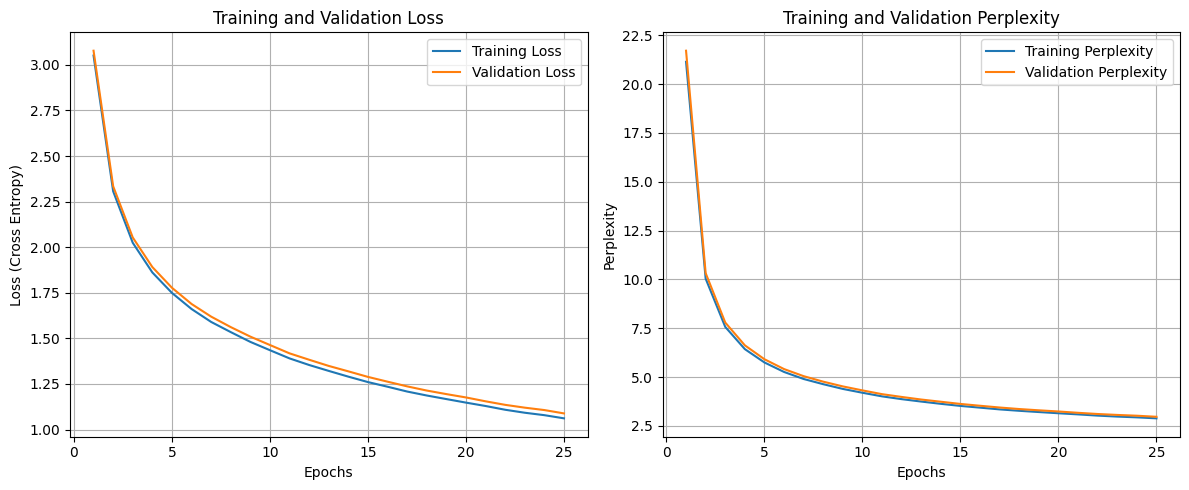


--- Final Evaluation on Validation Set ---
Loading best model from best_model_shakespeare_lstm.pt for final evaluation.
Final Perplexity on Validation Data: 2.97 (Loss: 1.09)

--- Text Generation Samples ---
Prime Text: 'JULIET:'

Generating 2 sample(s) with Temperature Sampling (Temp: 0.8):

--- Sample 1 ---
JULIET : Take me the bastard , and let me be king : Be not a man , it , I should be a child . MERCUTIO : To have a dispatch , sir , to it with me . DUKE VINCENTIO : She hath release d him , Isabel , to your brother ; To , and so are a man to thee . But do you not request the most re ach ing by this isle , to make them a king , And last to her that ne ' er was married for . I know not what to make me of your kindred , and pluck him with ing heart , as thou art , to make me a villain : ing my good lord and me ; I am not for them : and the next morn betimes , And that be p ous with the oak s blood That now this bear her day ? O , then she ' s gone ; I ' ll wear the first ow garland 

In [ ]:
#@title 1. Installations
# Install necessary libraries
!pip install torch numpy tokenizers nltk scikit-learn matplotlib -q

print("Libraries installed.")

#@title 2. NLTK Data (Optional, needed for --stemming)
import nltk

try:
    print("Checking/downloading NLTK data (punkt, wordnet, omw-1.4)...")
    nltk.download('punkt', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/omw-1.4')
    nltk.data.find('tokenizers/punkt')
    print("NLTK data seems available.")
    nltk_available = True
except LookupError:
    print("---------------------------------------------------------")
    print("NLTK data download might be needed or failed previously.")
    print("If stemming fails later, run the following in a code cell:")
    print("import nltk; nltk.download('punkt'); nltk.download('wordnet'); nltk.download('omw-1.4')")
    print("---------------------------------------------------------")
    nltk_available = False # Assume failure for now if lookup fails
except Exception as e:
     print(f"An error occurred during NLTK check/download: {e}")
     nltk_available = False

#@title 3. Imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler

import numpy as np
import time
import math
import os
import random
import string
import heapq
import matplotlib.pyplot as plt

# NLTK for optional stemming
from nltk.stem import PorterStemmer
# (nltk_available checked later)

# Tokenizers library
from tokenizers import Tokenizer
from tokenizers.models import BPE, WordPiece
from tokenizers.trainers import BpeTrainer, WordPieceTrainer
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.processors import TemplateProcessing # Useful for adding special tokens

# For file uploading in Colab
from google.colab import files

#@title 4. Configuration (Modify parameters here)

class Config:
    # --- Data and Tokenizer ---
    data_file = 'shakespeare.txt' # Will be uploaded to this name in Colab
    tokenizer_type = 'bpe'         # 'bpe' or 'wordpiece'
    vocab_size = 8000              # Target vocabulary size
    # Tokenizer path uses type and vocab size automatically
    tokenizer_path_template = 'shakespeare_tokenizer_{type}_{vs}{stem_suffix}.json'
    stemming = False               # Set to True to enable stemming (requires NLTK download)

    # --- Model Architecture ---
    model = 'lstm'                 # 'rnn', 'lstm', or 'gru'
    embedding_dim = 256
    hidden_dim = 512
    num_layers = 2
    bidirectional = False          # Set to True for bidirectional
    dropout = 0.5

    # --- Training ---
    seq_len = 60                   # Sequence length in tokens
    batch_size = 128
    epochs = 25                    # Adjust as needed (can take time)
    lr = 0.002
    optimizer = 'adam'             # 'adam' or 'rmsprop'
    clip = 1.0                     # Gradient clipping value
    seed = 42
    log_interval = 50              # Batches between logs
    validation_split = 0.1         # 10% for validation

    # --- Model Saving/Loading ---
    # Save path uses model type and bidir status automatically
    save_path_template = 'best_model_shakespeare_{model_name}.pt'
    load_path = None               # Set to a path (e.g., 'best_model_shakespeare_lstm.pt') to load and skip training

    # --- Generation ---
    generate_len = 500             # Number of tokens to generate
    temperature = 0.8              # Temperature for sampling
    beam_width = 0                 # Beam width for beam search (0 disables beam search)
    num_samples = 2                # Number of samples to generate for each method
    prime_text = 'JULIET:'         # Seed text

    # --- Environment ---
    disable_cuda = False           # Set to True to force CPU


# Instantiate config
config = Config()

# Disable stemming if NLTK isn't ready
if config.stemming and not nltk_available:
    print("Warning: NLTK not available or setup failed. Disabling stemming in config.")
    config.stemming = False

# Format tokenizer and save paths dynamically
stem_suffix = '_stemmed' if config.stemming else ''
config.tokenizer_path = config.tokenizer_path_template.format(
    type=config.tokenizer_type, vs=config.vocab_size, stem_suffix=stem_suffix
)
model_name = f"{config.model}{'_bi' if config.bidirectional else ''}"
config.save_path = config.save_path_template.format(model_name=model_name)

# --- 5. Setup Device and Seed ---
torch.manual_seed(config.seed)
np.random.seed(config.seed)
random.seed(config.seed)
use_cuda = not config.disable_cuda and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Using device: {device}")
print(f"Tokenizer will be saved/loaded from: {config.tokenizer_path}")
print(f"Best model will be saved to: {config.save_path}")


#@title 6. Helper Function: Stemming
def apply_stemming(text):
    """Applies Porter stemming to the text."""
    if not nltk_available:
        print("Skipping stemming as NLTK is not available.")
        return text
    print("Applying stemming...")
    stemmer = PorterStemmer()
    # Tokenize into words first for stemming
    try:
        words = nltk.word_tokenize(text)
        stemmed_words = [stemmer.stem(word) for word in words]
        print("Stemming complete.")
        return ' '.join(stemmed_words)
    except Exception as e:
        print(f"Error during NLTK word tokenization/stemming: {e}")
        print("Proceeding without stemming.")
        return text # Return original text if error

#@title 7. Tokenizer Function
def train_or_load_tokenizer(data_content, tokenizer_path, vocab_size, tokenizer_type='bpe', apply_stem=False):
    """Trains or loads a BPE/WordPiece tokenizer from text content."""

    # Check existence based on potentially modified path if stemming
    final_tokenizer_path = tokenizer_path
    if apply_stem:
         base, ext = os.path.splitext(tokenizer_path)
         # Ensure template wasn't already applied
         if '{type}' not in base and '{vs}' not in base:
              final_tokenizer_path = f"{base.replace('_stemmed','')}_stemmed{ext}"
         else: # Apply template now if it wasn't before
             stem_suffix = '_stemmed'
             final_tokenizer_path = config.tokenizer_path_template.format(
                type=config.tokenizer_type, vs=config.vocab_size, stem_suffix=stem_suffix
             )
         print(f"Checking for stemmed tokenizer at: {final_tokenizer_path}")


    if os.path.exists(final_tokenizer_path):
        print(f"Loading existing tokenizer from {final_tokenizer_path}")
        try:
            tokenizer = Tokenizer.from_file(final_tokenizer_path)
            if tokenizer.get_vocab_size() < vocab_size: # Allow larger existing vocab
                 print(f"Warning: Loaded tokenizer vocab size ({tokenizer.get_vocab_size()}) is smaller than requested ({vocab_size}).")
                 # Decide if retraining is necessary - for simplicity, let's use the loaded one
            return tokenizer
        except Exception as e:
            print(f"Error loading tokenizer: {e}. Will attempt to retrain.")

    print(f"Training new {tokenizer_type.upper()} tokenizer{' with stemming' if apply_stem else ''}...")
    text_to_train = apply_stemming(data_content) if apply_stem else data_content

    if not text_to_train:
         raise ValueError("No text content provided for tokenizer training.")

    special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"] # Common special tokens

    if tokenizer_type == 'bpe':
        tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
        trainer = BpeTrainer(vocab_size=vocab_size, special_tokens=special_tokens)
    elif tokenizer_type == 'wordpiece':
        tokenizer = Tokenizer(WordPiece(unk_token="[UNK]"))
        trainer = WordPieceTrainer(vocab_size=vocab_size, special_tokens=special_tokens)
    else:
        raise ValueError("Unsupported tokenizer type. Choose 'bpe' or 'wordpiece'.")

    tokenizer.pre_tokenizer = Whitespace()

    # Train using an iterator
    def text_iterator():
        # Process in chunks if memory is a concern, here simple yield
        yield text_to_train

    tokenizer.train_from_iterator(text_iterator(), trainer, length=len(text_to_train))

    # Set post-processor (optional, adds CLS/SEP for some tasks, not strictly needed for generation)
    # tokenizer.post_processor = TemplateProcessing(
    #     single="[CLS] $A [SEP]",
    #     pair="[CLS] $A [SEP] $B:1 [SEP]:1",
    #     special_tokens=[
    #         ("[CLS]", tokenizer.token_to_id("[CLS]")),
    #         ("[SEP]", tokenizer.token_to_id("[SEP]")),
    #     ],
    # )


    # Save the tokenizer
    try:
        # Use the final_tokenizer_path determined earlier
        tokenizer.save(final_tokenizer_path)
        print(f"Tokenizer trained and saved to {final_tokenizer_path}")
    except Exception as e:
        print(f"Error saving tokenizer to {final_tokenizer_path}: {e}")

    # Ensure PAD token exists after training/loading
    if tokenizer.token_to_id("[PAD]") is None:
         tokenizer.add_special_tokens(["[PAD]"])
         print("Added [PAD] token.")

    return tokenizer

#@title 8. Upload Dataset
# Upload the shakespeare.txt file
print(f"Please upload the dataset file ('{config.data_file}' or specify different name in Config)")
uploaded = files.upload()

# Verify upload and read content
if config.data_file not in uploaded:
    if len(uploaded) == 1:
        # If only one file was uploaded, assume it's the correct one
        uploaded_filename = list(uploaded.keys())[0]
        print(f"Assuming uploaded file '{uploaded_filename}' is the dataset.")
        config.data_file = uploaded_filename # Update config if name differs
        raw_text = uploaded[uploaded_filename].decode('utf-8')
    else:
        raise ValueError(f"File '{config.data_file}' not found in upload. Please upload the correct file.")
else:
    raw_text = uploaded[config.data_file].decode('utf-8')

print(f"Successfully loaded {len(raw_text)} characters from {config.data_file}")

# --- Train or Load Tokenizer ---
# Pass the actual text content now
try:
    tokenizer = train_or_load_tokenizer(raw_text, config.tokenizer_path, config.vocab_size, config.tokenizer_type, config.stemming)
except Exception as e:
    print(f"\n--- Error during tokenizer step ---")
    print(e)
    print("Please check file content, permissions, or NLTK setup if using stemming.")
    # Stop execution if tokenizer fails critically
    raise


#@title 9. Dataset Class (Subword)
class SubwordTextDataset(Dataset):
    def __init__(self, text, seq_len, tokenizer, apply_stem=False):
        self.seq_len = seq_len
        self.tokenizer = tokenizer
        self.vocab_size = tokenizer.get_vocab_size()
        print("Processing text for dataset...")
        processed_text = apply_stemming(text) if apply_stem else text

        print("Encoding text with tokenizer...")
        # Encode the whole text - okay for Shakespeare size
        self.encoded_ids = tokenizer.encode(processed_text).ids
        print("Encoding complete.")

        self.sequences = []
        self.targets = []
        if len(self.encoded_ids) <= seq_len:
             raise ValueError(f"Processed text is too short ({len(self.encoded_ids)} tokens) for sequence length {seq_len}")

        print("Creating sequences...")
        for i in range(0, len(self.encoded_ids) - seq_len):
            # Input sequence: tokens from i to i+seq_len-1
            seq_in = self.encoded_ids[i : i + seq_len]
            # Target sequence: tokens from i+1 to i+seq_len
            seq_out = self.encoded_ids[i + 1 : i + seq_len + 1]
            self.sequences.append(seq_in)
            self.targets.append(seq_out)
        print("Sequence creation complete.")

        print(f"\nTokenizer Vocabulary size: {self.vocab_size}")
        print(f"Total tokens in processed text: {len(self.encoded_ids)}")
        print(f"Total sequences created: {len(self.sequences)}")

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, index):
        return (torch.tensor(self.sequences[index], dtype=torch.long),
                torch.tensor(self.targets[index], dtype=torch.long))

#@title 10. Create Dataset and Dataloaders
# Create dataset
dataset = SubwordTextDataset(raw_text, config.seq_len, tokenizer, config.stemming)

# Create Train/Validation Split
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(config.validation_split * dataset_size))
np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Handle case where split might be 0
if split == 0:
     print("Warning: Validation split is 0, using full dataset for training and evaluation.")
     train_indices = indices
     val_indices = indices # Use all data if no validation split

train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(val_indices) # Use SubsetRandomSampler for validation too

train_dataloader = DataLoader(dataset, batch_size=config.batch_size, sampler=train_sampler, drop_last=True)
# Important: Use drop_last=True for validation too, to ensure consistent batch sizes for hidden state initialization in evaluate func.
# Alternatively, modify evaluate to handle variable last batch size. Let's keep drop_last=True for simplicity here.
validation_dataloader = DataLoader(dataset, batch_size=config.batch_size, sampler=validation_sampler, drop_last=True)

print(f"Training set size: {len(train_indices)}")
print(f"Validation set size: {len(val_indices)}")
print(f"Number of training batches: {len(train_dataloader)}")
print(f"Number of validation batches: {len(validation_dataloader)}")


#@title 11. Model Definition
class RNNModel(nn.Module):
    """ Generic RNN model adaptable for RNN, LSTM, or GRU units. """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers,
                 dropout=0.5, model_type='lstm', bidirectional=False):
        super().__init__()
        self.model_type = model_type.lower()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.num_directions = 2 if bidirectional else 1

        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        rnn_layer_args = {
            'input_size': embedding_dim,
            'hidden_size': hidden_dim,
            'num_layers': num_layers,
            'dropout': dropout if num_layers > 1 else 0,
            'batch_first': True,
            'bidirectional': bidirectional
        }

        if self.model_type == 'lstm':
            self.rnn = nn.LSTM(**rnn_layer_args)
        elif self.model_type == 'gru':
            self.rnn = nn.GRU(**rnn_layer_args)
        elif self.model_type == 'rnn':
            self.rnn = nn.RNN(rnn_layer_args['input_size'], rnn_layer_args['hidden_size'],
                             rnn_layer_args['num_layers'], batch_first=True,
                             bidirectional=bidirectional,
                             dropout=rnn_layer_args['dropout'], nonlinearity='tanh') # Added nonlinearity
        else:
            raise ValueError("Unsupported RNN type. Choose 'rnn', 'lstm', or 'gru'.")

        self.dropout_layer = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * self.num_directions, vocab_size)

        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()
        self.fc.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, hidden):
        # src shape: [batch_size, seq_len]
        embedded = self.dropout_layer(self.embedding(src))
        # embedded shape: [batch_size, seq_len, embedding_dim]

        output, hidden = self.rnn(embedded, hidden)
        # output shape: [batch_size, seq_len, hidden_dim * num_directions]

        output = self.dropout_layer(output)

        # decoded shape: [batch_size * seq_len, vocab_size]
        decoded = self.fc(output.reshape(output.size(0) * output.size(1), output.size(2)))

        # return shape: [batch_size, seq_len, vocab_size], hidden_state
        return decoded.view(output.size(0), output.size(1), decoded.size(1)), hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        layers_x_directions = self.num_layers * self.num_directions
        if self.model_type == 'lstm':
            # LSTM hidden state: (h_n, c_n)
            h_0 = weight.new(layers_x_directions, batch_size, self.hidden_dim).zero_().to(device)
            c_0 = weight.new(layers_x_directions, batch_size, self.hidden_dim).zero_().to(device)
            return (h_0, c_0)
        else: # GRU or RNN hidden state: h_n
            return weight.new(layers_x_directions, batch_size, self.hidden_dim).zero_().to(device)

#@title 12. Instantiate Model, Loss, Optimizer
# Instantiate the model
model = RNNModel(
    tokenizer.get_vocab_size(),
    config.embedding_dim,
    config.hidden_dim,
    config.num_layers,
    config.dropout,
    config.model,
    config.bidirectional
).to(device)

print("\n--- Model Architecture ---")
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params:,}")

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()

if config.optimizer == 'adam':
    optimizer = optim.Adam(model.parameters(), lr=config.lr)
elif config.optimizer == 'rmsprop':
    optimizer = optim.RMSprop(model.parameters(), lr=config.lr)
else:
    raise ValueError("Unsupported optimizer type.")

# Optional: Learning Rate Scheduler
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8) # Example: Decay LR every 5 epochs

#@title 13. Training and Evaluation Functions
# (Using train and evaluate functions defined previously - no code needed here, just run if modified)

def train(model, dataloader, epoch, criterion, optimizer, clip, vocab_size):
    model.train()
    total_loss = 0.
    start_time = time.time()
    hidden = model.init_hidden(config.batch_size) # Use config batch size

    num_batches = len(dataloader)
    for batch_idx, (data, targets) in enumerate(dataloader):
        data, targets = data.to(device), targets.to(device)
        # Starting each batch with a detached hidden state is crucial for truncated BPTT
        if isinstance(hidden, tuple): # LSTM
            hidden = tuple([h.detach() for h in hidden])
        else: # GRU/RNN
            hidden = hidden.detach()

        optimizer.zero_grad()
        output, hidden = model(data, hidden) # hidden is updated in place
        # Reshape for loss calculation:
        # Output: [batch_size, seq_len, vocab_size] -> [batch_size * seq_len, vocab_size]
        # Target: [batch_size, seq_len] -> [batch_size * seq_len]
        loss = criterion(output.view(-1, vocab_size), targets.reshape(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        total_loss += loss.item()

        if batch_idx % config.log_interval == 0 and batch_idx > 0:
            cur_loss = total_loss / config.log_interval
            elapsed = time.time() - start_time
            ppl = math.exp(cur_loss) if cur_loss > 0 else float('inf')
            print(f'| epoch {epoch:3d} | {batch_idx:5d}/{num_batches:5d} batches | '
                  # f'lr {optimizer.param_groups[0]["lr"]:.2e} | ' # Uncomment if using scheduler
                  f'ms/batch {elapsed * 1000 / config.log_interval:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0.
            start_time = time.time()


def evaluate(model, dataloader, criterion, vocab_size):
    model.eval()
    total_loss = 0.
    total_tokens = 0

    # Use the dataloader's actual batch size if different from config (esp. for validation)
    eval_batch_size = dataloader.batch_size
    hidden = model.init_hidden(eval_batch_size) # Initialize hidden state for eval batch size

    with torch.no_grad():
        for data, targets in dataloader:
            data, targets = data.to(device), targets.to(device)

            # Detach hidden state before processing batch
            if isinstance(hidden, tuple): # LSTM
                 hidden = tuple([h.detach() for h in hidden])
            else: # GRU/RNN
                 hidden = hidden.detach()

             # Handle potential last batch size mismatch if drop_last=False
            if data.size(0) != eval_batch_size:
                 hidden = model.init_hidden(data.size(0)) # Re-init if batch size changes
                 eval_batch_size = data.size(0) # Update current batch size


            output, hidden = model(data, hidden)
            output_flat = output.view(-1, vocab_size)
            targets_flat = targets.reshape(-1)
            loss = criterion(output_flat, targets_flat)
            total_loss += loss.item() * targets_flat.size(0)
            total_tokens += targets_flat.size(0)

    if total_tokens == 0: return float('inf'), float('inf')
    avg_loss = total_loss / total_tokens
    perplexity = math.exp(avg_loss) if avg_loss > 0 else float('inf')
    return avg_loss, perplexity

#@title 14. Generation Functions (Temperature and Beam Search)
# (Using generate_text_temperature and generate_text_beam_search defined previously)

# Temperature Sampling
def generate_text_temperature(model, start_string, length, temperature, tokenizer, device):
    model.eval()
    generated_ids = []

    prime_ids = tokenizer.encode(start_string).ids
    if not prime_ids:
        print("Warning: Prime text encoded to empty sequence. Using space.")
        start_token_id = tokenizer.token_to_id(" ") or 0
        prime_ids = [start_token_id]

    current_sequence = torch.tensor([prime_ids], dtype=torch.long).to(device)
    hidden = model.init_hidden(1) # Batch size 1

    # Warm up hidden state
    with torch.no_grad():
        init_input = current_sequence[:, -config.seq_len:] # Use config seq_len for warmup consistency
        output_init, hidden = model(init_input, hidden)
        # Use the last token of the prime sequence as the first input for generation
        input_token_id = current_sequence[:, -1].unsqueeze(0) # Shape: [1, 1]

    generated_ids.extend(prime_ids)

    for _ in range(length):
        with torch.no_grad():
            if isinstance(hidden, tuple): # LSTM
                hidden = tuple([h.detach() for h in hidden])
            else: # GRU/RNN
                hidden = hidden.detach()

            output, hidden = model(input_token_id, hidden)
            # Output shape is [1, 1, vocab_size], take the last time step's output
            output_last_step = output[:, -1, :] # Shape: [1, vocab_size]
            output_dist = output_last_step.squeeze().div(temperature).exp() # Shape: [vocab_size]

            # Handle potential numerical instability
            if torch.isinf(output_dist).any() or torch.isnan(output_dist).any():
                print("Warning: Numerical instability in output distribution. Sampling uniformly.")
                top_token_id = random.randrange(tokenizer.get_vocab_size())
            else:
                top_token_id = torch.multinomial(output_dist, 1)[0].item()


            generated_ids.append(top_token_id)
            input_token_id = torch.tensor([[top_token_id]], dtype=torch.long).to(device)

    # Decode and clean up
    text = tokenizer.decode(generated_ids)
    text = text.replace("[UNK]", "?")
    text = text.replace(" ##", "").replace("##", "") # WordPiece cleanup
    text = text.replace("Ġ", " ") # BPE space cleanup
    return text

# Beam Search Generation
def generate_text_beam_search(model, start_string, length, beam_width, tokenizer, device):
    model.eval()

    prime_ids = tokenizer.encode(start_string).ids
    if not prime_ids:
        print("Warning: Prime text encoded to empty sequence for beam search. Using space.")
        start_token_id = tokenizer.token_to_id(" ") or 0
        prime_ids = [start_token_id]

    start_sequence_tensor = torch.tensor([prime_ids], dtype=torch.long).to(device)

    # Initialize hidden state based on prime text
    hidden = model.init_hidden(1) # Batch size 1
    with torch.no_grad():
        init_input = start_sequence_tensor[:, -config.seq_len:]
        _, hidden = model(init_input, hidden)

    # Beam search initialization
    # Each beam: (log_probability, sequence_ids_list, hidden_state)
    # Use negative log probability, heapq finds minimum
    beams = [(-0.0, prime_ids, hidden)]

    for _ in range(length):
        new_beams_candidates = []
        for log_prob, seq_ids, current_hidden in beams:
            # Detach hidden state
            if isinstance(current_hidden, tuple): # LSTM
                current_hidden_detached = tuple([h.detach() for h in current_hidden])
            else: # GRU/RNN
                current_hidden_detached = current_hidden.detach()

            # Get the last token ID as input
            last_token_id = seq_ids[-1]
            input_token = torch.tensor([[last_token_id]], dtype=torch.long).to(device)

            with torch.no_grad():
                output, next_hidden = model(input_token, current_hidden_detached)

            # Get log probabilities for the next token
            log_probs = F.log_softmax(output.squeeze(), dim=0) # Shape [vocab_size]

            # Get top k log probabilities and indices
            top_log_probs, top_indices = torch.topk(log_probs, beam_width)

            # Expand the current beam
            for i in range(beam_width):
                next_token_id = top_indices[i].item()
                # Handle padding or end tokens if necessary
                # if next_token_id == tokenizer.token_to_id("[PAD]"): continue
                new_log_prob = log_prob + top_log_probs[i].item() # Add log probs
                new_seq_ids = seq_ids + [next_token_id]
                # Store as (neg_log_prob, seq, hidden) for min-heap
                new_beams_candidates.append((-new_log_prob, new_seq_ids, next_hidden))

        # Prune beams efficiently using heapq
        # Keep track of the best beam_width candidates based on log probability
        if len(new_beams_candidates) > beam_width:
            best_new_beams = heapq.nsmallest(beam_width, new_beams_candidates, key=lambda x: x[0])
        else:
            best_new_beams = new_beams_candidates

        # Convert back to (log_prob, seq, hidden) format
        beams = [(-neg_log_prob, seq, hid) for neg_log_prob, seq, hid in best_new_beams]

        # Early stopping condition (e.g., if all beams end with EOS token) could be added here

    # Select the beam with the highest log probability (lowest negative log prob)
    best_log_prob, best_seq_ids, _ = beams[0]

    # Decode and clean up
    text = tokenizer.decode(best_seq_ids)
    text = text.replace("[UNK]", "?")
    text = text.replace(" ##", "").replace("##", "")
    text = text.replace("Ġ", " ")
    return text


#@title 15. Training Loop Execution
best_val_perplexity = float('inf')
train_losses, val_losses = [], []
train_perplexities, val_perplexities = [], []
start_epoch = 1
epochs_to_run = config.epochs

if config.load_path and os.path.exists(config.load_path):
    try:
        print(f"Loading pre-trained model from {config.load_path}...")
        model.load_state_dict(torch.load(config.load_path, map_location=device))
        print("Model loaded successfully. Skipping training.")
        epochs_to_run = 0 # Do not train if loading
    except Exception as e:
        print(f"Could not load model from {config.load_path}. Error: {e}. Training from scratch.")
        config.load_path = None # Ensure training happens if loading fails
else:
    print("No pre-trained model specified or found. Training from scratch.")


if epochs_to_run > 0:
    print("\n--- Starting Training ---")
    try:
        for epoch in range(start_epoch, epochs_to_run + 1):
            epoch_start_time = time.time()
            # Train one epoch
            train(model, train_dataloader, epoch, criterion, optimizer, config.clip, dataset.vocab_size)

            # Validate
            val_loss, val_perplexity = evaluate(model, validation_dataloader, criterion, dataset.vocab_size)
            train_loss, train_perplexity = evaluate(model, train_dataloader, criterion, dataset.vocab_size) # Eval on train too for comparison

            # Store metrics for plotting
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_perplexities.append(train_perplexity)
            val_perplexities.append(val_perplexity)

            print('-' * 89)
            print(f'| end of epoch {epoch:3d} | time: {(time.time() - epoch_start_time):5.2f}s | '
                  f'train loss {train_loss:5.2f} | train ppl {train_perplexity:8.2f} | '
                  f'valid loss {val_loss:5.2f} | valid ppl {val_perplexity:8.2f}')
            print('-' * 89)

            # Save the model if validation perplexity improves
            if val_perplexity < best_val_perplexity:
                best_val_perplexity = val_perplexity
                torch.save(model.state_dict(), config.save_path)
                print(f"** Saved best model (Epoch {epoch}) to {config.save_path} with Val PPL: {best_val_perplexity:.2f} **")

            # Optional Learning Rate Scheduling Step
            # if scheduler: scheduler.step()

    except KeyboardInterrupt:
        print('-' * 89)
        print('Exiting training early via KeyboardInterrupt')
        # Save the current model state if interrupted
        interrupted_path = f"{config.save_path}_interrupted_epoch{epoch}.pt"
        torch.save(model.state_dict(), interrupted_path)
        print(f"Saved interrupted model state to {interrupted_path}")

    # Load the best model found during training for final evaluation/generation
    if os.path.exists(config.save_path):
         print(f"\nLoading best model from {config.save_path} for final steps.")
         model.load_state_dict(torch.load(config.save_path, map_location=device))
    else:
         print("\nWarning: No best model checkpoint saved (or training was skipped/interrupted early). Using final/loaded model state.")

#@title 16. Plot Training & Validation Metrics

# Check if training occurred
if train_losses and val_losses:
    epochs_range = range(start_epoch, start_epoch + len(train_losses))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (Cross Entropy)')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_perplexities, label='Training Perplexity')
    plt.plot(epochs_range, val_perplexities, label='Validation Perplexity')
    plt.xlabel('Epochs')
    plt.ylabel('Perplexity')
    plt.title('Training and Validation Perplexity')
    # Optionally set y-axis limits for perplexity if it starts very high
    # plt.ylim(0, max(val_perplexities)*1.1 if val_perplexities else 500) # Example limit
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping metric plotting as no training was performed (model loaded or zero epochs).")

#@title 17. Final Evaluation and Generation
print("\n--- Final Evaluation on Validation Set ---")
# Ensure validation dataloader is ready
if 'validation_dataloader' not in locals():
     validation_sampler = SubsetRandomSampler(val_indices)
     validation_dataloader = DataLoader(dataset, batch_size=config.batch_size, sampler=validation_sampler, drop_last=True)

# Load best model if it exists and wasn't loaded already
if not config.load_path and os.path.exists(config.save_path):
    print(f"Loading best model from {config.save_path} for final evaluation.")
    model.load_state_dict(torch.load(config.save_path, map_location=device))
elif config.load_path:
     print("Using the pre-loaded model for final evaluation.")
else:
     print("Using the model state after last training epoch/interruption for final evaluation.")


final_val_loss, final_val_perplexity = evaluate(model, validation_dataloader, criterion, dataset.vocab_size)
print(f"Final Perplexity on Validation Data: {final_val_perplexity:.2f} (Loss: {final_val_loss:.2f})")

# --- Text Generation Comparison ---
print("\n--- Text Generation Samples ---")
print(f"Prime Text: '{config.prime_text}'")

print(f"\nGenerating {config.num_samples} sample(s) with Temperature Sampling (Temp: {config.temperature}):")
for i in range(config.num_samples):
    print(f"\n--- Sample {i+1} ---")
    generated_temp = generate_text_temperature(model, config.prime_text, config.generate_len, config.temperature, tokenizer, device)
    print(generated_temp)
    print("-" * 40)

if config.beam_width > 0:
    print(f"\nGenerating with Beam Search (Beam Width: {config.beam_width}):")
    # Beam search is deterministic, so one sample is usually enough to show its output style
    print(f"\n--- Sample 1 ---")
    generated_beam = generate_text_beam_search(model, config.prime_text, config.generate_len, config.beam_width, tokenizer, device)
    print(generated_beam)
    print("-" * 40)
else:
    print("\nBeam search disabled (beam_width=0).")